In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
# 1. Các thư viện cần thiết
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
df =pd.read_csv('BID_Stock_Data.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/27/2014,13193956055,13264512695,12770621094,12982289063,12982289063,4593392
1,2/6/2014,12841176758,12911732422,12417841797,12417841797,12417841797,1360040
2,2/7/2014,12276729492,12347285156,11641726563,11712282227,11712282227,4234371
3,2/10/2014,11641726563,12135618164,11430058594,11994505859,11994505859,5771436
4,2/11/2014,12135618164,12135618164,11923950195,11923950195,11923950195,2747437
...,...,...,...,...,...,...,...
2460,12/8/2023,40600000000,42000000000,40600000000,41900000000,41900000000,2406400
2461,12/11/2023,42000000000,42200000000,41350000000,41400000000,41400000000,1589400
2462,12/12/2023,41500000000,42050000000,41200000000,41900000000,41900000000,956200
2463,12/13/2023,41900000000,42000000000,40600000000,41600000000,41600000000,793400


In [3]:
data = df['Close'][::-1];
val= data.reset_index(drop=True);
val

0       41600000000
1       41600000000
2       41900000000
3       41400000000
4       41900000000
           ...     
2460    11923950195
2461    11994505859
2462    11712282227
2463    12417841797
2464    12982289063
Name: Close, Length: 2465, dtype: int64

In [4]:
# Create a date range starting from a specific date
start_date = '1/27/2014'
stop_date = '12/14/2023'
dates = pd.date_range(start=start_date, periods=len(val),freq='D')

In [7]:
# 2. Đọc file dữ liệu  và chia train test  theo tỉ lệ 9 1
df = pd.read_csv('BID_Stock_Data.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [8]:
!pip install pmdarima

In [9]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=95616.375, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=95609.367, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=95610.475, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=95610.467, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=95608.030, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=95612.448, Time=0.69 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.302 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [10]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [14]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[3.44307383e+10 3.44307383e+10 3.44307383e+10 3.44307383e+10
 3.44307383e+10 3.44307383e+10 3.44307383e+10 3.44307383e+10
 3.44307383e+10 3.44307383e+10 3.44307383e+10 3.44307383e+10
 3.44307383e+10 3.44307383e+10 3.44307383e+10 3.44307383e+10
 3.44307383e+10 3.44307383e+10 3.44307383e+10 3.44307383e+10
 3.44307383e+10 3.44307383e+10 3.44307383e+10 3.44307383e+10
 3.44307383e+10 3.44307383e+10 3.44307383e+10 3.44307383e+10
 3.44307383e+10 3.44307383e+10]


Testing RMSE: 5351398912.5826235
Testing MAPE: 0.124867643475172
Testing MSLE: 0.020476768254082806


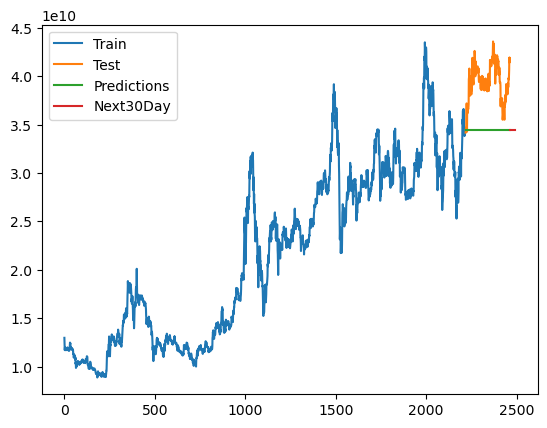

In [15]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error

# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# Calculate MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()